![](Images/2022-12-01-14-25-01.png)

In [2]:
import pyomo.environ as pyo
import random
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# initiate the model
model = pyo.AbstractModel()

# Declare the parameters and variables
model.N = pyo.Param(mutable=True, default=10)
model.I = pyo.RangeSet(1, model.N)
model.J = pyo.Set(initialize=model.I)

model.U = pyo.Var(model.I, model.J, within=pyo.Binary, initialize=1)

# Decalre the constraints
# 1 row check
def constraints_1(model, i):
    return np.sum(model.U[i,j] for j in model.J) <= 1
model.c1 = pyo.Constraint(model.I, rule = constraints_1)

# 2 column check
def constraints_2(model, j):
    return np.sum(model.U[i, j] for i in model.I) <= 1
model.c2 = pyo.Constraint(model.J, rule = constraints_2)

# 3 First diagonal check
def constraints_3(model, i, j):
    total_Queen = 0
    for r in model.I:
        for c in model.J:
            if j-c == i-r:
                total_Queen+=model.U[c,r]
    return total_Queen <=1
model.c3 = pyo.Constraint(model.I, model.J, rule = constraints_3)

# 4 second diagonal check
def constraints_4(model, i, j):
    total_Queen = 0
    for r in model.I:
        for c in model.J:
            if j-c == r-i:
                total_Queen+=model.U[c,r]
    return total_Queen <= 1
model.c4 = pyo.Constraint(model.I, model.J, rule=constraints_4)

# 5 check if there is a queen in row, column, or diagonal
def constraints_5(model, i, j):
    total_Queen = 0
    for r in model.I:
        for c in model.J:
            if np.abs(j-c) == np.abs(r-i) or j == c  or i == r:
                total_Queen+=model.U[c,r]
    return total_Queen >= 1
model.c5 = pyo.Constraint(model.I, model.J, rule=constraints_5)

# Declare the objective function
def obj_fun(model):
    return np.sum(model.U[i,j] for i in model.I for j in model.J)
model.OF = pyo.Objective(rule=obj_fun, sense=pyo.minimize )

# Define the solver
solver = pyo.SolverFactory('glpk')
instance = model.create_instance()
results = solver.solve(instance)

results.write()

    mutable Param).  The linkage between this RangeSet and the original source
    data will be broken, so updating the data value in the future will not be
    reflected in this RangeSet.  To suppress this warning, explicitly convert
    the source data to a constant type (e.g., float, int, or immutable Param)


C:\Users\20100\AppData\Local\Temp\ipykernel_15584\3338758789.py:14: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(model.U[i,j] for j in model.J) <= 1
C:\Users\20100\AppData\Local\Temp\ipykernel_15584\3338758789.py:19: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(model.U[i, j] for i in model.I) <= 1
C:\Users\20100\AppData\Local\Temp\ipykernel_15584\3338758789.py:54: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(model.U[i,j] for i in model.I for j in model.J)


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 5.0
  Upper bound: 5.0
  Number of objectives: 1
  Number of constraints: 321
  Number of variables: 101
  Number of nonzeros: 4581
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 1053
      Number of created subproblems: 1053
  Error rc: 0
  Time: 1.9003307819366455
# ----------------------------------------------------------
#   Solution Information
# -----------------------------

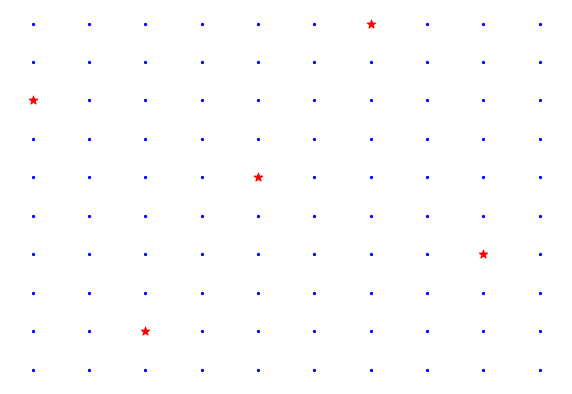

In [4]:
# visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.axis('off')

for i in instance.I:
    for j in instance.J:
        plt.scatter(i,j, c='b', s= 5)
        # check if there is a queen or not
        if pyo.value(instance.U[i,j]) ==1:
            plt.scatter(i,j, c='r', s=80, marker='*')

    mutable Param).  The linkage between this RangeSet and the original source
    data will be broken, so updating the data value in the future will not be
    reflected in this RangeSet.  To suppress this warning, explicitly convert
    the source data to a constant type (e.g., float, int, or immutable Param)


C:\Users\20100\AppData\Local\Temp\ipykernel_15584\3338758789.py:14: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(model.U[i,j] for j in model.J) <= 1
C:\Users\20100\AppData\Local\Temp\ipykernel_15584\3338758789.py:19: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(model.U[i, j] for i in model.I) <= 1
C:\Users\20100\AppData\Local\Temp\ipykernel_15584\3338758789.py:54: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(model.U[i,j] for i in model.I for j in model.J)


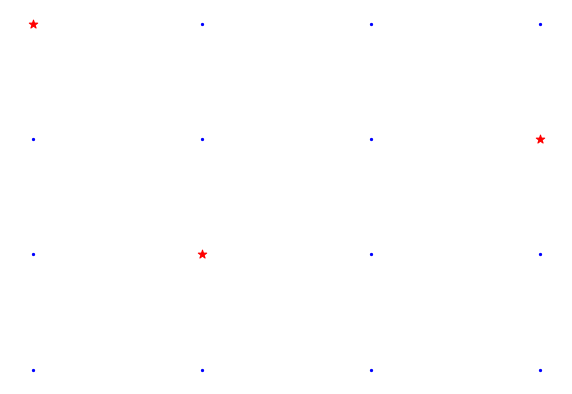

In [11]:
# Define the number of rows or columns
model.N = 4
instance = model.create_instance()
_ = solver.solve(instance)


# visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.axis('off')

for i in instance.I:
    for j in instance.J:
        plt.scatter(i,j, c='b', s= 5)
        # check if there is a queen or not
        if pyo.value(instance.U[i,j]) ==1:
            plt.scatter(i,j, c='r', s=80, marker='*')